In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(42000, 785)

In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_, m_train = X_train.shape

In [6]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
X_train.shape

(784, 41000)

In [8]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [9]:
def derivative_ReLU(Z):
    return Z > 0

In [10]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [11]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [12]:
def init_param():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [13]:
def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [14]:
def backward_propagation(Z1, A1, Z2, A2, W2, X, Y):
    # m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [15]:
def upgrade_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - dW1 * alpha
    b1 = b1 - db1 * alpha
    W2 = W2 - dW2 * alpha
    b2 = b2 - db2 * alpha
    return W1, b1, W2, b2

In [16]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [17]:
def get_accuracy(predictions, Y):
    # print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [18]:
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_param()
    
    for _ in range(iterations):

        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)

        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W2, X, Y)

        W1, b1, W2, b2 = upgrade_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if _ % 100 == 0:
            print('Iterations: ', _)
            pred = get_predictions(A2)
            print('Accuracy: ', get_accuracy(pred, Y))
    return W1, b1, W2, b2

In [19]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iterations:  0
Accuracy:  0.12963414634146342
Iterations:  100
Accuracy:  0.665219512195122
Iterations:  200
Accuracy:  0.7780243902439025
Iterations:  300
Accuracy:  0.8219268292682926
Iterations:  400
Accuracy:  0.8438048780487805


In [20]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [21]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  5


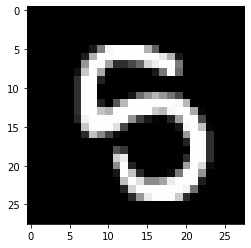

In [22]:
test_prediction(0, W1, b1, W2, b2)

Prediction:  [1]
Label:  1


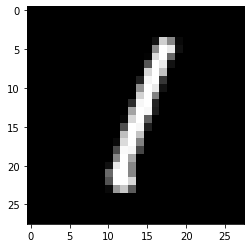

In [26]:
test_prediction(12324, W1, b1, W2, b2)